In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd

In [2]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(267569)

df_lineup = df_lineup = parser.lineup(267569)

In [3]:
df_lineup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_id        36 non-null     int64 
 1   player_name      36 non-null     object
 2   player_nickname  36 non-null     object
 3   jersey_number    36 non-null     int64 
 4   match_id         36 non-null     int64 
 5   team_id          36 non-null     int64 
 6   team_name        36 non-null     object
 7   country_id       36 non-null     int64 
 8   country_name     36 non-null     object
dtypes: int64(5), object(4)
memory usage: 2.7+ KB


In [4]:
df_combined = df.merge(df_lineup[['player_name', 'player_nickname']], on='player_name', how='left')

In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3667 non-null   object 
 1   index                           3667 non-null   int64  
 2   period                          3667 non-null   int64  
 3   timestamp                       3667 non-null   object 
 4   minute                          3667 non-null   int64  
 5   second                          3667 non-null   int64  
 6   possession                      3667 non-null   int64  
 7   duration                        2672 non-null   float64
 8   match_id                        3667 non-null   int64  
 9   type_id                         3667 non-null   int64  
 10  type_name                       3667 non-null   object 
 11  possession_team_id              3667 non-null   int64  
 12  possession_team_name            36

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3667 non-null   object 
 1   index                           3667 non-null   int64  
 2   period                          3667 non-null   int64  
 3   timestamp                       3667 non-null   object 
 4   minute                          3667 non-null   int64  
 5   second                          3667 non-null   int64  
 6   possession                      3667 non-null   int64  
 7   duration                        2672 non-null   float64
 8   match_id                        3667 non-null   int64  
 9   type_id                         3667 non-null   int64  
 10  type_name                       3667 non-null   object 
 11  possession_team_id              3667 non-null   int64  
 12  possession_team_name            36

In [7]:
sub = df.loc[df['type_name']=='Substitution'].loc[df["team_name"]=="Barcelona"].iloc[0]["index"]

In [8]:
sub

2850

In [9]:
df['team_name'].unique()

array(['Real Madrid', 'Barcelona'], dtype=object)

In [10]:
mask_barca = (df.type_name == "Pass") & (df.team_name == "Barcelona") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")

In [11]:
df[df['type_name']=="Pass"][["type_name","outcome_name", "outcome_id"]]

,type_name,outcome_name,outcome_id
4,Pass,NaN,NaN
7,Pass,NaN,NaN
10,Pass,NaN,NaN
14,Pass,NaN,NaN
17,Pass,NaN,NaN
...,...,...,...
3635,Pass,NaN,NaN
3639,Pass,NaN,NaN
3653,Pass,NaN,NaN
3657,Pass,NaN,NaN


In [12]:
df_pass = df.loc[mask_barca, ['x', 'y', 'end_x', 'end_y', "player_id", "player_name", "pass_recipient_id", "pass_recipient_name"]]

In [13]:
df_pass.head()

,x,y,end_x,end_y,player_id,player_name,pass_recipient_id,pass_recipient_name
42,34.1,64.7,21.5,52.1,5246.0,Luis Alberto Suárez Díaz,5492.0,Samuel Yves Umtiti
105,7.0,36.1,40.6,13.5,20055.0,Marc-André ter Stegen,5492.0,Samuel Yves Umtiti
107,43.2,13.7,49.2,5.1,5492.0,Samuel Yves Umtiti,5211.0,Jordi Alba Ramos
111,45.4,4.1,41.1,29.9,5211.0,Jordi Alba Ramos,5203.0,Sergio Busquets i Burgos
137,8.3,4.6,24.9,10.8,5216.0,Andrés Iniesta Luján,6402.0,Francisco Alcácer García


In [14]:
df_pass = df_pass.merge(df_lineup[["player_id","player_nickname"]], on="player_id", how = "left")

In [15]:
df_pass = df_pass[["x","y","end_x","end_y","player_nickname","pass_recipient_id","pass_recipient_name"]]

In [16]:
df_pass = df_pass.merge(df_lineup[["player_id","player_nickname"]], left_on="pass_recipient_id", right_on = "player_id", how = "left")

In [18]:
df_pass = df_pass[['x', 'y','end_x', 'end_y','player_nickname_x', 'player_nickname_y']]

In [19]:
df_pass

,x,y,end_x,end_y,player_nickname_x,player_nickname_y
0,34.1,64.7,21.5,52.1,Luis Suárez,Samuel Umtiti
1,7.0,36.1,40.6,13.5,Marc-André ter Stegen,Samuel Umtiti
2,43.2,13.7,49.2,5.1,Samuel Umtiti,Jordi Alba
3,45.4,4.1,41.1,29.9,Jordi Alba,Sergio Busquets
4,8.3,4.6,24.9,10.8,Andrés Iniesta,Paco Alcácer
...,...,...,...,...,...,...
390,103.9,66.2,100.5,55.2,Ivan Rakitić,Sergio Busquets
391,100.0,56.2,99.1,59.1,Sergio Busquets,Ivan Rakitić
392,77.8,36.4,82.6,41.0,Gerard Piqué,Lionel Messi
393,82.6,41.0,71.3,49.4,Lionel Messi,Sergio Busquets


In [20]:
df_pass = df_pass.rename(columns={
    'player_nickname_x': 'player_name',
    'player_nickname_y': 'pass_recipient_name'
})


In [21]:
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
0,34.1,64.7,21.5,52.1,Luis Suárez,Samuel Umtiti
1,7.0,36.1,40.6,13.5,Marc-André ter Stegen,Samuel Umtiti
2,43.2,13.7,49.2,5.1,Samuel Umtiti,Jordi Alba
3,45.4,4.1,41.1,29.9,Jordi Alba,Sergio Busquets
4,8.3,4.6,24.9,10.8,Andrés Iniesta,Paco Alcácer
...,...,...,...,...,...,...
390,103.9,66.2,100.5,55.2,Ivan Rakitić,Sergio Busquets
391,100.0,56.2,99.1,59.1,Sergio Busquets,Ivan Rakitić
392,77.8,36.4,82.6,41.0,Gerard Piqué,Lionel Messi
393,82.6,41.0,71.3,49.4,Lionel Messi,Sergio Busquets


In [22]:
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

In [23]:
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
0,34.1,64.7,21.5,52.1,Suárez,Umtiti
1,7.0,36.1,40.6,13.5,Stegen,Umtiti
2,43.2,13.7,49.2,5.1,Umtiti,Alba
3,45.4,4.1,41.1,29.9,Alba,Busquets
4,8.3,4.6,24.9,10.8,Iniesta,Alcácer
...,...,...,...,...,...,...
390,103.9,66.2,100.5,55.2,Rakitić,Busquets
391,100.0,56.2,99.1,59.1,Busquets,Rakitić
392,77.8,36.4,82.6,41.0,Piqué,Messi
393,82.6,41.0,71.3,49.4,Messi,Busquets


In [24]:
scatter_df = pd.DataFrame()

In [25]:
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    scatter_df.at[i,"x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i,"y"] = np.mean(np.concatenate([passy, recy]))
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [26]:
scatter_df.head()

,player_name,x,y,no,marker_size
0,Suárez,70.418182,37.500000,15.0,381.355932
1,Stegen,16.693443,38.772131,37.0,940.677966
2,Umtiti,44.197674,29.644186,46.0,1169.491525
3,Alba,63.410769,20.743077,33.0,838.983051
4,Iniesta,58.877982,28.825688,53.0,1347.457627


In [27]:
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

In [28]:
df_pass.head()

,x,y,end_x,end_y,player_name,pass_recipient_name,pair_key
0,34.1,64.7,21.5,52.1,Suárez,Umtiti,Suárez_Umtiti
1,7.0,36.1,40.6,13.5,Stegen,Umtiti,Stegen_Umtiti
2,43.2,13.7,49.2,5.1,Umtiti,Alba,Alba_Umtiti
3,45.4,4.1,41.1,29.9,Alba,Busquets,Alba_Busquets
4,8.3,4.6,24.9,10.8,Iniesta,Alcácer,Alcácer_Iniesta


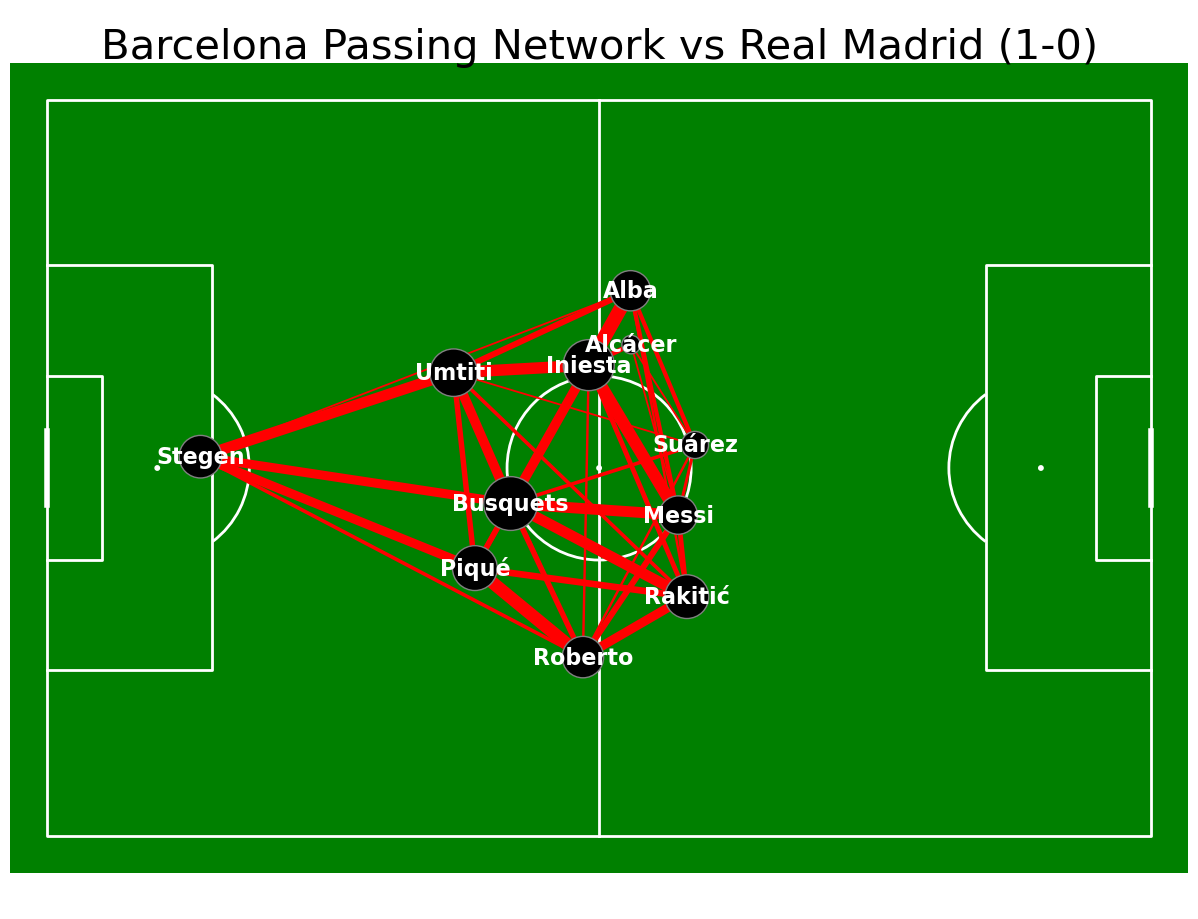

In [29]:
pitch = Pitch(pitch_color = "green", line_color = "white")
fig, ax = pitch.grid(grid_height = 0.9, title_height = 0.06, axis = False, endnote_height = 0.04, title_space = 0, endnote_space = 0)

pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='black', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)


for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy = (row.x, row.y), c="white", va="center", ha="center", weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("Barcelona Passing Network vs Real Madrid (1-0)", fontsize = 30)
plt.show()
fig.suptitle("Nodes location - Barca", fontsize = 30)
plt.show()

In [30]:
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)

Centralisation index is  0.06430379746835443
